Deep Learningで使われる最適化アルゴリズムには色々あるんだけど、それらの振る舞いがどんな風に異なるのか、というのは人類みな一度は考えたことのある疑問ではないだろうか。というわけで、GWに暇なので試してみた。

In [358]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anm
import tensorflow as tf

回転行列を作る関数

In [357]:
def rotation_matrix(th):
    ret = np.zeros((2,2))
    ret[0,0], ret[0,1] = np.cos(th), -np.sin(th)
    ret[1,0], ret[1,1] = np.sin(th), np.cos(th)
    return ret

$\alpha(x-a)^2 + \beta(x-b)$を$\theta$回転させた関数を定義しておく。

In [3]:
def quad(x, y, a, b, alpha, beta, theta):
    x = x - a
    y = y - b
    # print(np.array((x,y)).shape)
    mat = rotation_matrix(-theta)
    X = np.array((x, y))
    # print(X.shape)
    x, y = np.tensordot(mat, X, (1, 0))
    return alpha * x ** 2 + beta * y ** 2

In [4]:
def f1(x, y):
    return tf.exp(-quad(x, y, 2, 1, 0.1, 2, np.pi/4)) # ここがnp.expだとエラーが出るのでtf.expを使う

In [5]:
def f2(x, y):
    return tf.exp(-quad(x, y, -3, 3, 0.1, 2, -np.pi/4))

In [117]:
def f3(x, y):
    return 0.3 * (x-2)**2 + 0.1 * (y+4)**2

In [167]:
def f4(x, y):
    return tf.exp(-quad(x, y, 4, 5, 0.1, 2, 0))*2

In [318]:
# def f(x, y):
#     return f1(x, y) + f2(x, y) + f3(x, y) + f4(x, y)
def f(x, y):
    z1 = tf.exp(-quad(x, y, 2.5, 8, 0.1, 2.5, 0))
    z2 = tf.exp(-quad(x, y, -2.5, 6, 0.1, 2.5, 0))
    z3 = tf.exp(-quad(x, y, 2.5, 4, 0.1, 2.5, 0))
    z4 = tf.exp(-quad(x, y, -2.5, 2, 0.1, 2.5, 0))
    z5 = tf.exp(-quad(x, y, 0, 0, 1, 1, 0))
    return 0.02*x**2 + 0.02*(y+3)**2 + z1 + z2 + z3 + z4 - z5

In [319]:
x = np.linspace(-10,10,30)
y = np.linspace(-10,10,30)
x,y=np.meshgrid(x,y)
z = f(x, y)
with tf.Session() as sess:
    z = sess.run(z)        

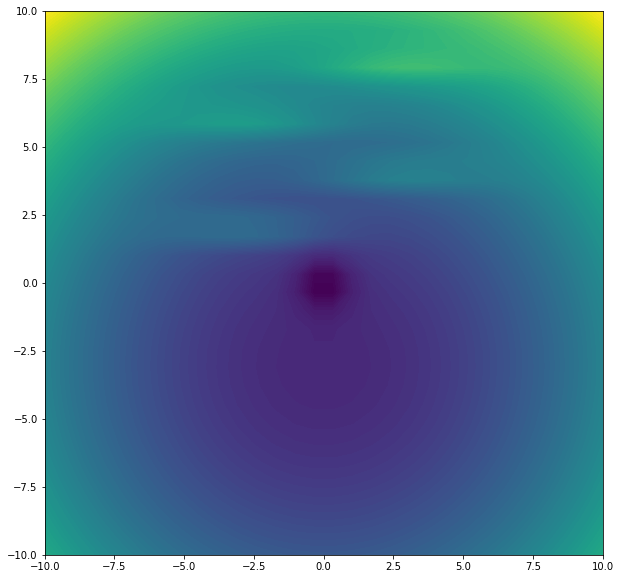

In [320]:
fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(x,y,z,levels=100)

In [321]:
X = tf.Variable(0, dtype=tf.float32)
Y = tf.Variable(10, dtype=tf.float32)
COST = f(X, Y)

In [322]:
def run_optimize(optimizer, num_step=100):
    param_hist = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        param_hist.append(sess.run((X, Y)))
        for _ in range(num_step):
            sess.run(optimizer)
            var = sess.run((X, Y))
            param_hist.append(var)
    return np.array(param_hist)

In [323]:
def plot_contour(xlim, ylim, f, ax):
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    x, y = np.meshgrid(x, y)
    z = f(x, y)
    with tf.Session() as sess:
        z = sess.run(z)
    ax.contourf(x, y, z,levels=100)
    return x,y,z

In [331]:
opt_step = 400

In [351]:
gd_step = tf.train.GradientDescentOptimizer(0.1).minimize(COST)
gd_hist = run_optimize(gd_step, opt_step)

In [352]:
adam_step = tf.train.AdamOptimizer(
    learning_rate=0.1,
    beta1=0.9,
    beta2=0.999,    
    epsilon=1e-08).minimize(COST)
adam_hist = run_optimize(adam_step, opt_step)

In [353]:
rms_step = tf.train.RMSPropOptimizer(
    learning_rate=0.1,
    decay=0.9,
    momentum=0.0,
    epsilon=1e-8
).minimize(COST)
rms_hist = run_optimize(rms_step, opt_step)

In [354]:
adagrad_step = tf.train.AdagradOptimizer(
    learning_rate=0.1,
    initial_accumulator_value=0.1
).minimize(COST)
adagrad_hist = run_optimize(adagrad_step, opt_step)

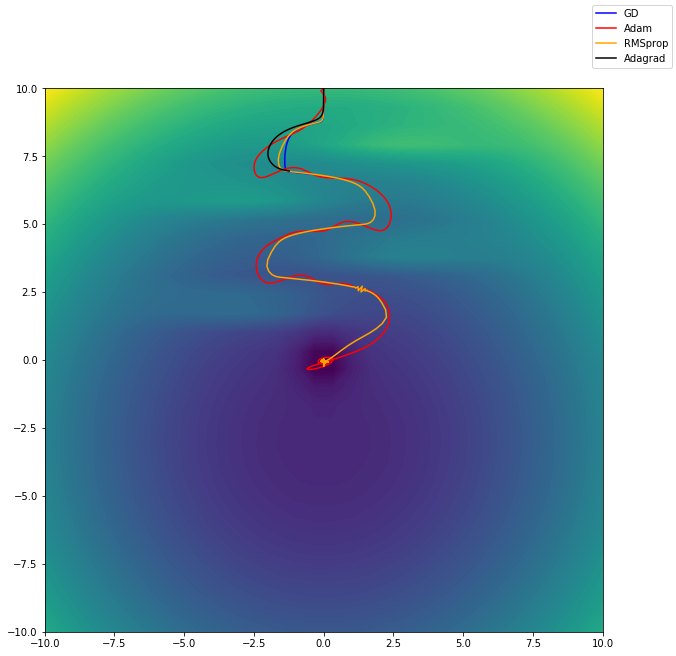

In [355]:
fig, ax = fig, ax = plt.subplots(figsize=(10,10))
x,y,z = plot_contour((-10,10), (-10,10), f, ax)
ax.plot(gd_hist[:,0], gd_hist[:,1], color='blue', label='GD')
ax.plot(adam_hist[:,0], adam_hist[:,1], color='red', label='Adam')
ax.plot(rms_hist[:,0], rms_hist[:,1], color='orange', label='RMSprop')
ax.plot(adagrad_hist[:,0], adagrad_hist[:,1], color='black', label='Adagrad')
fig.legend()

MovieWriter imagemagick unavailable. Trying to use pillow instead.


0 5
4 10
9 15
14 20
19 25
24 30
29 35
34 40
39 45
44 50
49 55
54 60
59 65
64 70
69 75
74 80
79 85
84 90
89 95
94 100
99 105
104 110
109 115
114 120
119 125
124 130
129 135
134 140
139 145
144 150
149 155
154 160
159 165
164 170
169 175
174 180
179 185
184 190
189 195
194 200
199 205
204 210
209 215
214 220
219 225
224 230
229 235
234 240
239 245
244 250
249 255
254 260
259 265
264 270
269 275
274 280
279 285
284 290
289 295
294 300
299 305
304 310
309 315
314 320
319 325
324 330
329 335
334 340
339 345
344 350
349 355
354 360
359 365
364 370
369 375
374 380
379 385
384 390
389 395
394 400
399 405
404 410


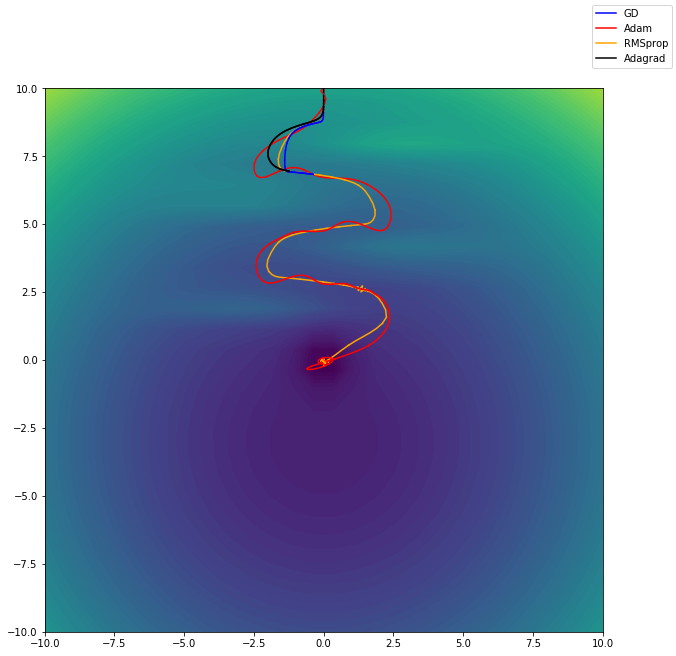

In [356]:
step = 5
index1 = 0
index2 = index1 + step
fig, ax = fig, ax = plt.subplots(figsize=(10,10))
x,y,z = plot_contour((-11,11), (-11,11), f, ax)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
def plot_frame(data):    
    global index1, index2
    print(index1, index2)
    # plt.cla()
    # ax.contourf(x,y,z,levels=100)
    ax.plot(gd_hist[index1:index2,0], gd_hist[index1:index2,1], color='blue', label='GD')
    ax.plot(adam_hist[index1:index2,0], adam_hist[index1:index2,1], color='red', label='Adam')
    ax.plot(rms_hist[index1:index2,0], rms_hist[index1:index2,1], color='orange', label='RMSprop')
    ax.plot(adagrad_hist[index1:index2,0], adagrad_hist[index1:index2,1], color='black', label='Adagrad')
    if index1 == 0: fig.legend()
    index1, index2 = index2-1, index2 + step
    
ani = anm.FuncAnimation(fig, plot_frame, interval=70, frames=opt_step//step)
ani.save("output.gif", writer="imagemagick")